In [3]:
import pandas as pd
#Question1
# A. Import 'BankChurners.csv' as DataFrame.
df = pd.read_csv('BankChurners.csv')

# B. Check the info of the dataset and also check if any duplicate records in the data.
df.info()
df.duplicated().sum()

# C. Print the 5-point summary of the data and share your insights on data distribution.
df.describe()

# D. Print the unique values of all the categorical columns in the dataset. Share your observations.
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

# E. Check for the % of missing values in the dataset. Do not treat the missing values here.
df.isnull().mean()

#Question2
# A. Drop redundant columns from the data.
df.drop(['CLIENTNUM'], axis=1, inplace=True)

# B. Encode the Existing and Attrited customers to 0 and 1 respectively in the ‘Attrition_Flag’ variable.
df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

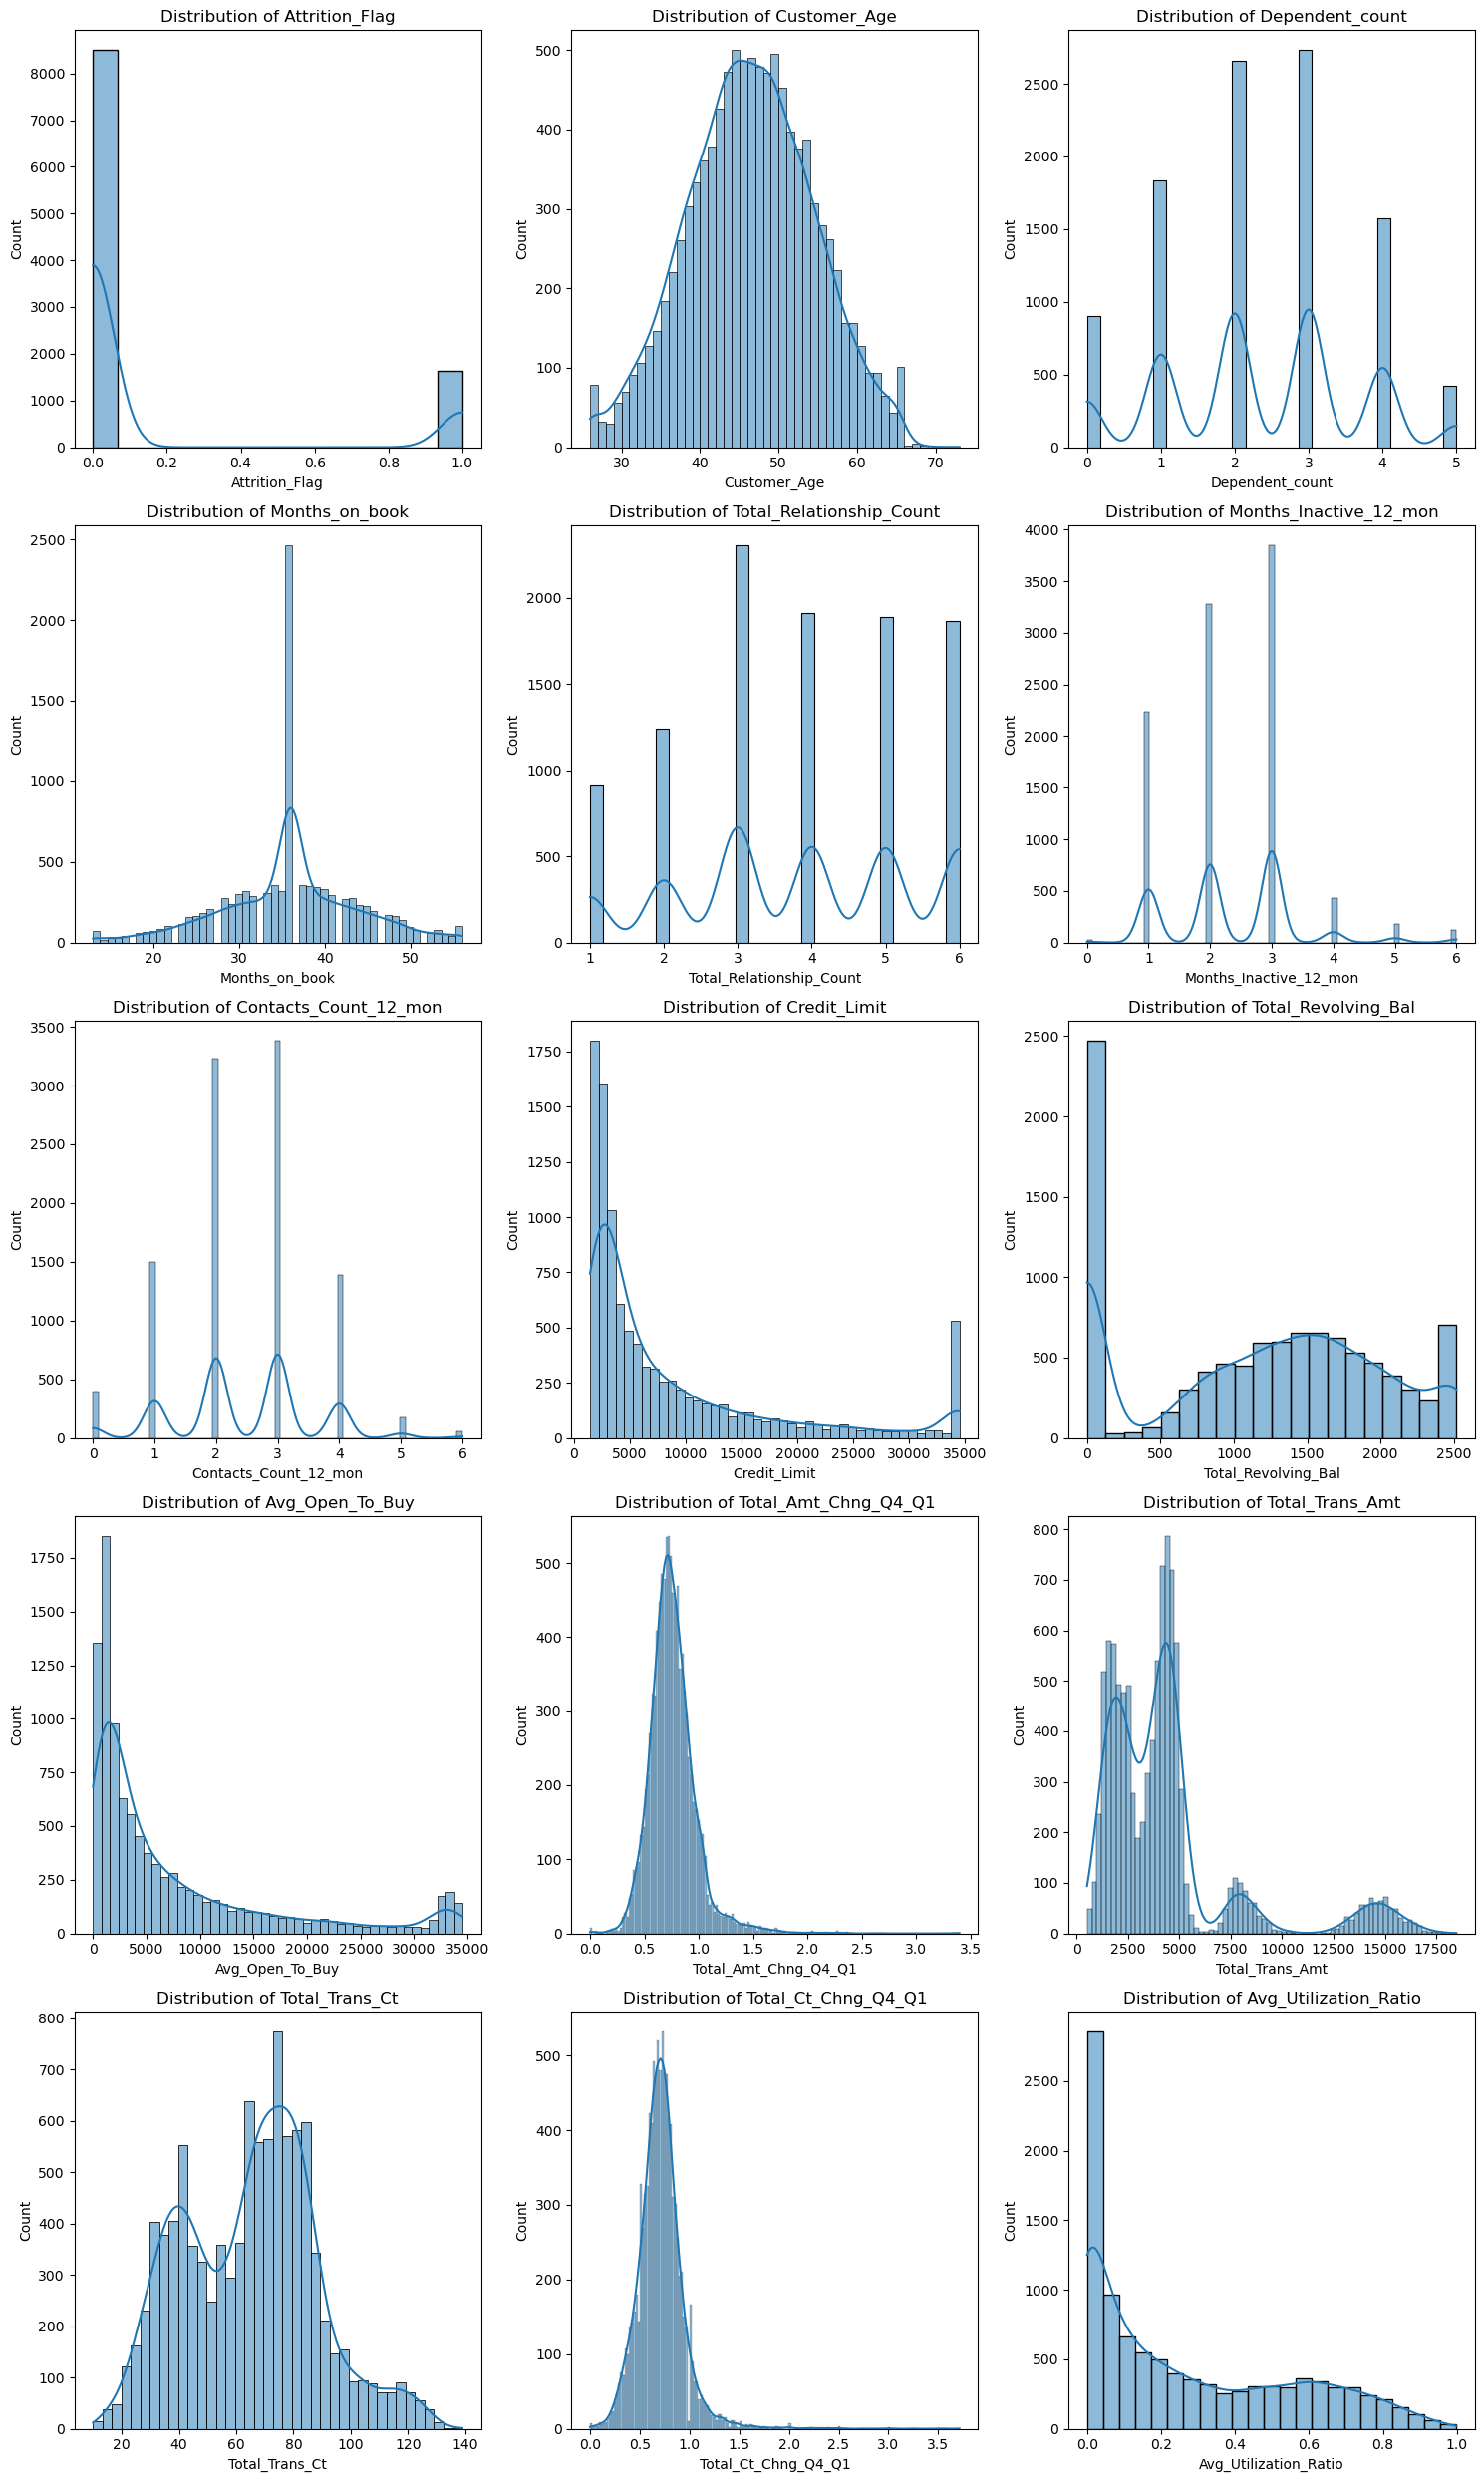

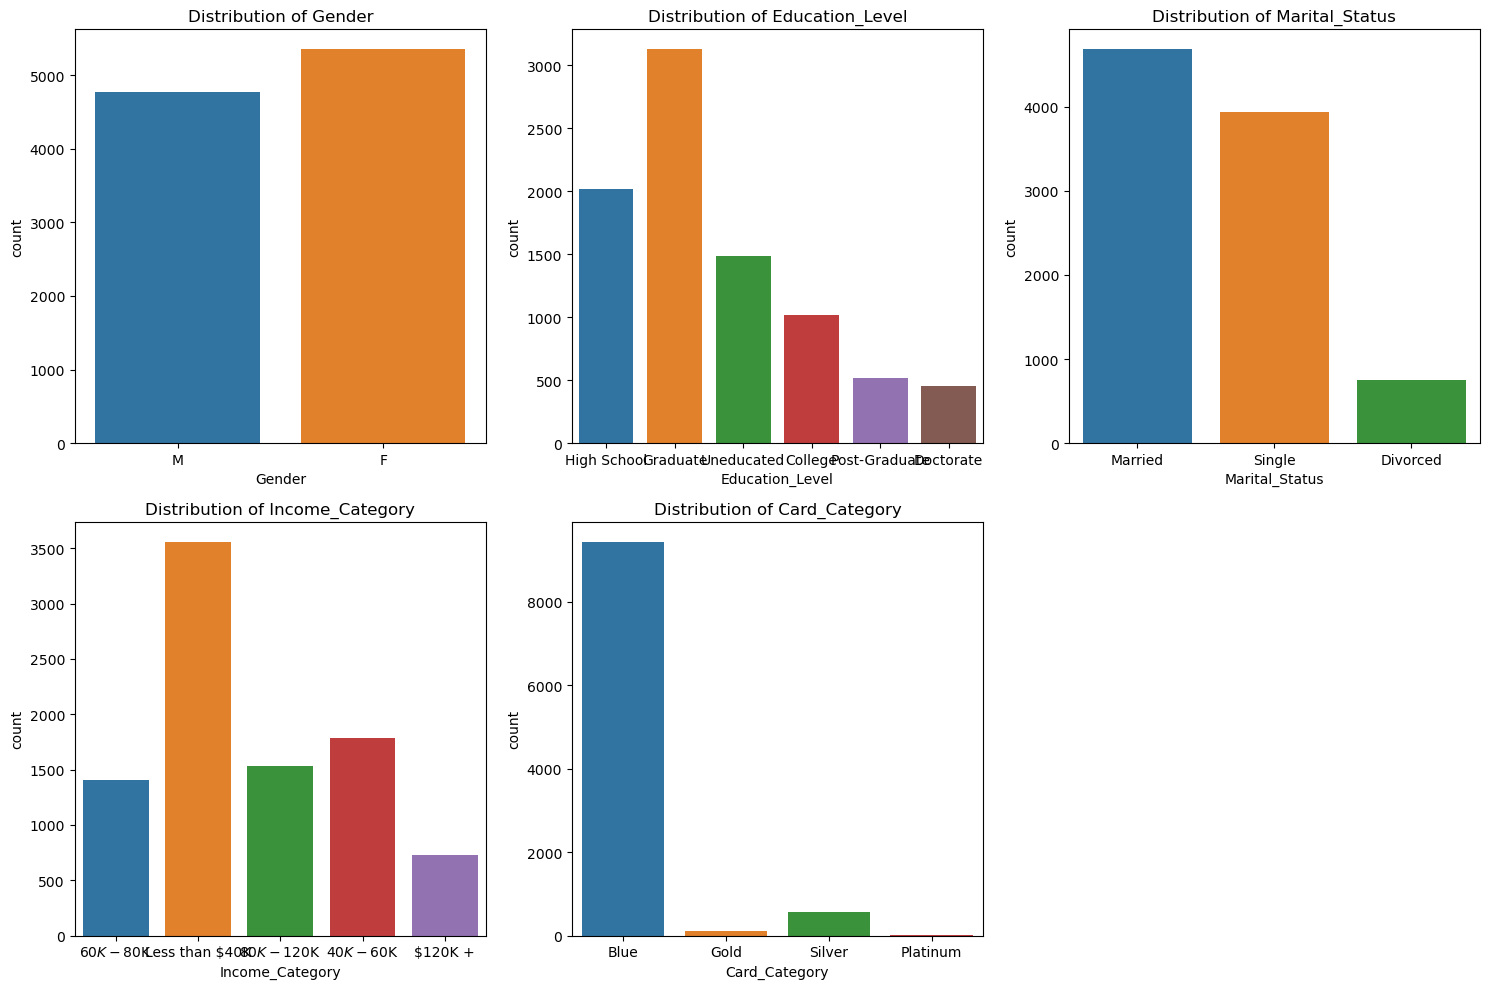

<Figure size 1500x1000 with 0 Axes>

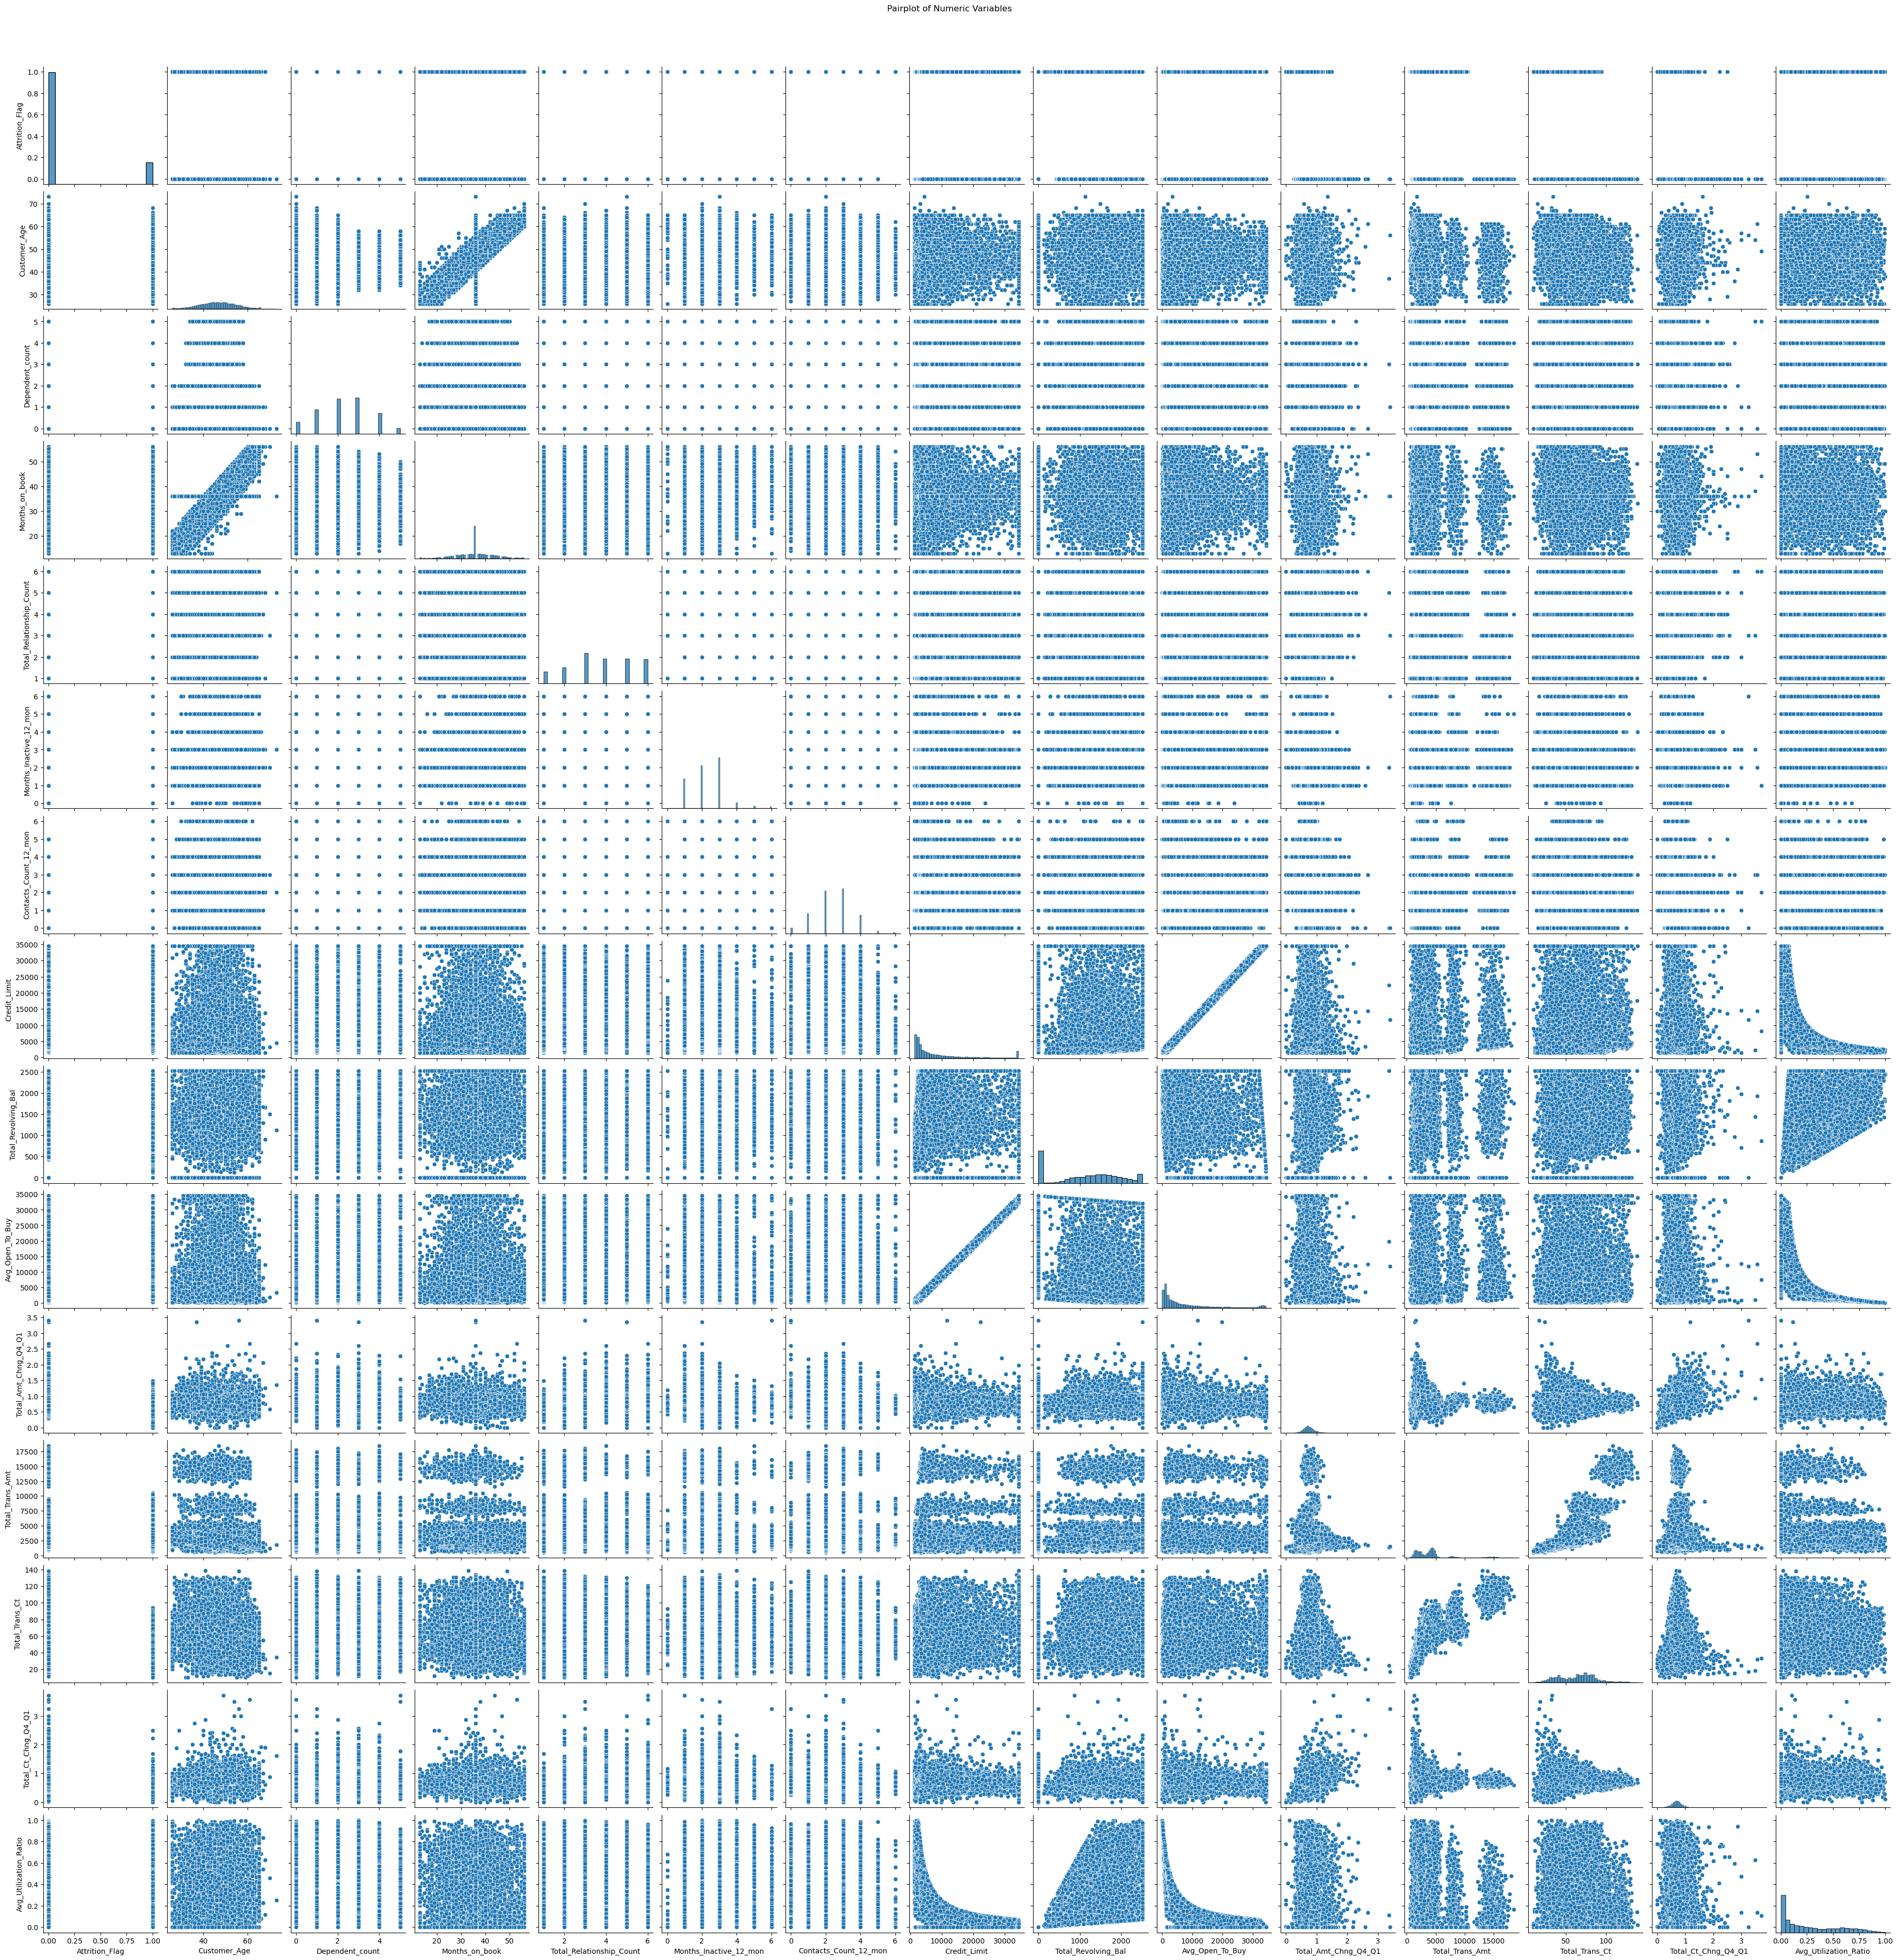

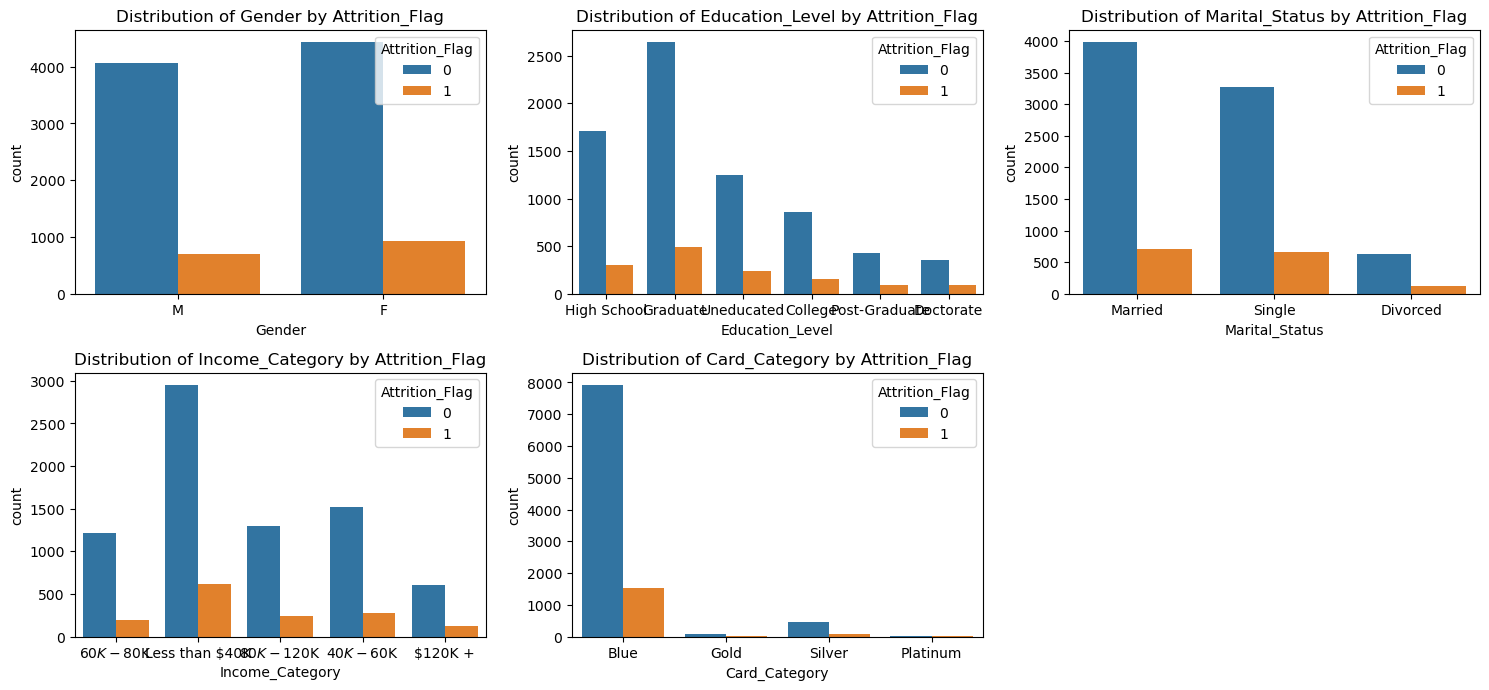

In [5]:
#Question3
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
# Visualizing the distribution of numeric variables
numeric_columns = df.select_dtypes(exclude='object').columns

# Calculate the number of rows and columns for subplots
num_numeric = len(numeric_columns)
num_rows = int((num_numeric + 2) / 3)
num_cols = min(num_numeric, 3)

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Visualizing the distribution of categorical variables
categorical_columns = df.select_dtypes(include='object').columns

num_categorical = len(categorical_columns)
num_rows_cat = int((num_categorical + 2) / 3)
num_cols_cat = min(num_categorical, 3)

plt.figure(figsize=(15, 5 * num_rows_cat))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows_cat, num_cols_cat, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Multivariate Analysis
# Visualizing the relationships between numeric variables
plt.figure(figsize=(15, 10))
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

# Visualizing the relationships between categorical variables and the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='Attrition_Flag')
    plt.title(f'Distribution of {col} by Attrition_Flag')

plt.tight_layout()
plt.show()

#Question4
import pandas as pd
import numpy as np  # Import NumPy

# A. Find the percentage of outliers, in each column of the data.
outliers_percentage = df.select_dtypes(exclude=['object']).apply(lambda x: len(x[x > x.quantile(0.95)]) / len(x))

# B. Replace 'abc' values with 'np.nan' in Income_Category column.
df['Income_Category'].replace('abc', np.nan, inplace=True)

# C. Separate Target and Predictor variables.
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']





In [43]:
# Question 5: Split data into train, validation, and test set.
# A. Split data into 2 parts, say temporary and test.
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# B. Now split the temporary set into train and validation.
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

# Question 6: Missing value Imputation.
# A. Impute all missing values in "Education_Level", "Marital_Status", "Income_Category" columns using suitable techniques from X_train, X_val, X_test separately.

from sklearn.impute import SimpleImputer

# Define the categorical columns
categorical_columns = ["Education_Level", "Marital_Status", "Income_Category"]

# Create a SimpleImputer instance with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for each dataset separately
for col in categorical_columns:
    # Check and impute for X_train
    if col in X_train.columns:
        X_train[col] = imputer.fit_transform(X_train[[col]])
    else:
        print(f"{col} not found in X_train columns.")

    # Check and impute for X_val
    if col in X_val.columns:
        X_val[col] = imputer.transform(X_val[[col]])
    else:
        print(f"{col} not found in X_val columns.")

    # Check and impute for X_test
    if col in X_test.columns:
        X_test[col] = imputer.transform(X_test[[col]])
    else:
        print(f"{col} not found in X_test columns.")

# Display a few rows of the modified datasets
print("\nX_train after imputation:")
print(X_train.head())

print("\nX_val after imputation:")
print(X_val.head())

print("\nX_test after imputation:")
print(X_test.head())

# Question 7
# A. Encode all Categorical columns in X_train, X_val, X_test using one-hot encoding.
cat_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in cat_columns:
    # One-hot encode the categorical column separately for X_train, X_val, and X_test
    X_train_encoded = pd.get_dummies(X_train[col], drop_first=True, prefix=col)
    X_val_encoded = pd.get_dummies(X_val[col], drop_first=True, prefix=col)
    X_test_encoded = pd.get_dummies(X_test[col], drop_first=True, prefix=col)

    # Concatenate the one-hot encoded columns to X_train, X_val, and X_test
    X_train = pd.concat([X_train, X_train_encoded], axis=1)
    X_val = pd.concat([X_val, X_val_encoded], axis=1)
    X_test = pd.concat([X_test, X_test_encoded], axis=1)

    # Drop the original categorical column from X_train, X_val, and X_test
    X_train = X_train.drop(columns=[col])
    X_val = X_val.drop(columns=[col])
    X_test = X_test.drop(columns=[col])

# Display a few rows of the modified datasets
print("\nX_train after encoding:")
print(X_train.head())

print("\nX_val after encoding:")
print(X_val.head())

print("\nX_test after encoding:")
print(X_test.head())



X_train after imputation:
      Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
800             40      M                2        Graduate         Single   
498             44      M                1        Graduate        Married   
4356            48      M                4     High School        Married   
407             41      M                2        Graduate        Married   
8728            46      M                4     High School       Divorced   

     Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
800          $120K +          Blue              21                         6   
498   Less than $40K          Blue              34                         6   
4356    $80K - $120K          Blue              36                         5   
407      $60K - $80K        Silver              36                         6   
8728     $40K - $60K        Silver              36                         2   

      Months_Inactive_12_mon 

In [41]:
# Question 8
# Model Building
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import numpy as np

# Check for NaN values
nan_indices_train = np.isnan(X_train)

# Handle missing values
if np.any(nan_indices_train):
    imputer = SimpleImputer(strategy='mean')

    # Check if there are any non-empty columns in X_train
    if np.any(~np.all(nan_indices_train, axis=0)):
        X_train = imputer.fit_transform(X_train)
    else:
        print("All columns in X_train have missing values. Imputation cannot be performed.")

print("Before preprocessing - X_train shape:", X_train.shape)

# Check if X_train is empty
# Check if X_train is empty
# Check if X_train is empty
if X_train.size == 0:
    print("Error: X_train is empty.")
else:
    # Check if X_train has columns (size along axis 1 > 0)
    if X_train.ndim == 2 and X_train.shape[1] > 0:
        # Handle missing values
        imputer = SimpleImputer(strategy='mean')
        X_train_imputed = imputer.fit_transform(X_train)

        # Ensure numeric data
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_imputed)

        # Reshape X_train if needed
        X_train_reshaped = X_train_scaled.reshape(-1, 1) if X_train_scaled.ndim == 1 else X_train_scaled

        # Make sure X_train_reshaped is a NumPy array
        X_train_reshaped = np.array(X_train_reshaped)

        print("Data type of X_train:", X_train_reshaped.dtype)


        # A. Build models on train data and validate on Validation set.
        best_recall = 0
        best_model_name = ''

        models = {
            'Decision Tree': DecisionTreeClassifier(random_state=1),
            'Logistic Regression': LogisticRegression(random_state=1),
            'Random Forest': RandomForestClassifier(random_state=1),
            'Gradient Boosting': GradientBoostingClassifier(random_state=1),
            'XG Boost': XGBClassifier(random_state=1)
        }

        # B. Validate the models built above on Validation set
        # Split the data into train and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X_train_reshaped, y_train, test_size=0.2, random_state=1)

        for name, model in models.items():
            model.fit(X_train, y_train)
            y_val_pred = model.predict(X_val)
            recall = recall_score(y_val, y_val_pred)
            print(f'{name} Recall: {recall}')

            if recall > best_recall:
                best_recall = recall
                best_model_name = name

        # C. Mention which model is giving us a better recall score.
        print(f'The model with the best recall score on the validation set is: {best_model_name} with Recall: {best_recall}')

        # D. Try target balancing with Up sampling the data.
        # Build all the above models on this balanced data. Share your insights on the recall score of the models.

        # Use SMOTE for oversampling
        smote = SMOTE(random_state=1)

        models_upsampled = {}

        for name, model in models.items():
            pipeline = Pipeline([('smote', smote), ('model', model)])
            pipeline.fit(X_train, y_train)
            y_val_pred = pipeline.predict(X_val)
            recall = recall_score(y_val, y_val_pred)
            print(f'{name} (Upsampled) Recall: {recall}')
            models_upsampled[name] = pipeline

        # E. Try target balancing with Down sampling the data.
        # Build all the above models on this balanced data. Share your insights on the recall score of the models.

        # Use RandomUnderSampler for downsampling
        rus = RandomUnderSampler(random_state=1)

        models_downsampled = {}

        for name, model in models.items():
            pipeline = Pipeline([('rus', rus), ('model', model)])
            pipeline.fit(X_train, y_train)
            y_val_pred = pipeline.predict(X_val)
            recall = recall_score(y_val, y_val_pred)
            print(f'{name} (Downsampled) Recall: {recall}')
            models_downsampled[name] = pipeline

        # F. Which data has better-performing models, its Original data or Up sampled data or Down Sampled data? Share your insights.
        # (Analyze and compare the model performances based on recall scores)

        # Calculate recall scores for each model on different datasets
        recall_scores_original = {name: recall_score(y_val, model.predict(X_val)) for name, model in models.items()}
        recall_scores_upsampled = {name: recall_score(y_val, model.predict(X_val)) for name, model in models_upsampled.items()}
        recall_scores_downsampled = {name: recall_score(y_val, model.predict(X_val)) for name, model in models_downsampled.items()}

        print("Recall Scores - Original Data:")
        print(recall_scores_original)

        print("\nRecall Scores - Upsampled Data:")
        print(recall_scores_upsampled)

        print("\nRecall Scores - Downsampled Data:")
        print(recall_scores_downsampled)

        # G. From the above-built models, which 2 models are outperforming with better recall score. Mention and share your insights.
        # (Analyze and compare the recall scores of all models and choose the top 2)
        top_2_models = sorted(recall_scores_original.items(), key=lambda x: x[1], reverse=True)[:2]
        print(f'Top 2 models based on recall score: {top_2_models}')
        
        

# Question 9
# A. Choose any 2 best performing models from above and tune the hyper parameters of those models
from sklearn.model_selection import GridSearchCV

# Assuming you have already loaded your data into X_train and y_train

# Check if X_train is a scalar or a 1D array
if np.isscalar(X_train) or X_train.ndim == 1:
    # If it's a scalar or 1D array, reshape it to a 2D array with a single row
    X_train = X_train.reshape(1, -1)

# Check for unexpected values (like NaN) in the data
if np.isnan(X_train).any():
    # Drop rows containing NaN
    nan_indices = np.isnan(X_train).any(axis=1)
    X_train = X_train[~nan_indices]
    y_train = y_train[~nan_indices]

# Check if y_train is a 1D array
if y_train.ndim == 1:
    # If it's 1-dimensional, reshape it to a 2D array with a single column
    y_train = y_train.to_numpy().reshape(-1, 1)
    
# Assuming you have selected models and data
selected_models = {
    'Random Forest': RandomForestClassifier(random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1)
}

param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
}

tuned_models = {}

for name, model in selected_models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    tuned_models[name] = grid_search.best_estimator_

# B. Build the models on the train data.
for name, model in tuned_models.items():
    model.fit(X_train, y_train)

# C. Now validate the models on test data. Check with all performance matrix. Share your insights.
for name, model in tuned_models.items():
    y_val_pred = model.predict(X_val)
    # Assuming you have the required metrics library imported
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f'{name} (Tuned) Performance on Validation Set:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('\n')

# Question 10
import pickle

# A - Pickle the selected model for future use.
with open('selected_model.pkl', 'wb') as file:
    pickle.dump(tuned_models['Gradient Boosting'], file)

# Assuming you have computed the necessary metrics
selected_model = tuned_models['Gradient Boosting']
y_val_pred = selected_model.predict(X_val)
recall = recall_score(y_val, y_val_pred)

print(f'Selected Model (Gradient Boosting) Performance on Validation Set:')
print(f'Recall: {recall}')

# B - Business Recommendations
if recall > 0.8:
    print("The model has a high recall, indicating good performance in identifying customers at risk of attrition.")
    print("Recommendation: Implement targeted retention strategies for customers identified as high risk.")
else:
    print("The model's recall is lower, indicating potential room for improvement in identifying customers at risk of attrition.")
    print("Recommendation: Further analyze and refine the model, considering additional features or alternative algorithms.")


Before preprocessing - X_train shape: (2488, 29)
Data type of X_train: float64
Decision Tree Recall: 0.6853932584269663
Logistic Regression Recall: 0.5617977528089888


C:\Users\moham\Downloads\New folder\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_17368\1221669700.py:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Recall: 0.6292134831460674


C:\Users\moham\Downloads\New folder\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Recall: 0.7865168539325843
XG Boost Recall: 0.7865168539325843
The model with the best recall score on the validation set is: Gradient Boosting with Recall: 0.7865168539325843
Decision Tree (Upsampled) Recall: 0.6966292134831461
Logistic Regression (Upsampled) Recall: 0.7865168539325843
Random Forest (Upsampled) Recall: 0.7415730337078652
Gradient Boosting (Upsampled) Recall: 0.8426966292134831
XG Boost (Upsampled) Recall: 0.8202247191011236
Decision Tree (Downsampled) Recall: 0.8426966292134831
Logistic Regression (Downsampled) Recall: 0.797752808988764
Random Forest (Downsampled) Recall: 0.9101123595505618
Gradient Boosting (Downsampled) Recall: 0.898876404494382
XG Boost (Downsampled) Recall: 0.9101123595505618
Recall Scores - Original Data:
{'Decision Tree': 0.8426966292134831, 'Logistic Regression': 0.797752808988764, 'Random Forest': 0.9101123595505618, 'Gradient Boosting': 0.898876404494382, 'XG Boost': 0.9101123595505618}

Recall Scores - Upsampled Data:
{'Dec

C:\Users\moham\Downloads\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\moham\Downloads\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\moham\Downloads\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\moham\Downloads\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:686:

Random Forest (Tuned) Performance on Validation Set:
Accuracy: 0.9056224899598394
Precision: 0.8888888888888888
Recall: 0.5393258426966292
F1 Score: 0.6713286713286712


Gradient Boosting (Tuned) Performance on Validation Set:
Accuracy: 0.9417670682730924
Precision: 0.875
Recall: 0.7865168539325843
F1 Score: 0.8284023668639053


Selected Model (Gradient Boosting) Performance on Validation Set:
Recall: 0.7865168539325843
The model's recall is lower, indicating potential room for improvement in identifying customers at risk of attrition.
Recommendation: Further analyze and refine the model, considering additional features or alternative algorithms.
